In [1]:
# IMPORTS
from vanilla_option import vanilla_option
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')


# INPUTS
S = 100
K = 100
T = 1/12
r = 0.01
q = 0
sd = 0.15

# Straddle

(0, 15.08474195759787)

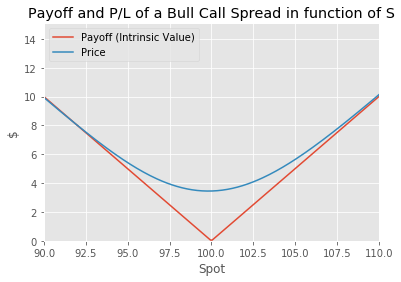

In [10]:
# Define strategy prices and intrinsic values
spots = list(np.linspace(start = 0.85*S, stop = 1.15*S, num = 300))
strategy_payoffs = [vanilla_option(spot, K, T, r, q, sd, 'Call').intrinsic() 
                    + vanilla_option(spot, K, T, r, q, sd, 'Put').intrinsic() for spot in spots]
strategy_prices = [vanilla_option(spot, K, T, r, q, sd, 'Call').bs_price() 
                    + vanilla_option(spot, K, T, r, q, sd, 'Put').bs_price() for spot in spots]


### Payoff and price plot
plt.plot(spots, strategy_payoffs, label = 'Payoff (Intrinsic Value)')
plt.plot(spots, strategy_prices, label = 'Price')
plt.xlabel('Spot')
plt.ylabel('$')
plt.legend(loc = 'upper left')
plt.title('Payoff and P/L of a Bull Call Spread in function of S')
plt.xlim(left = 0.90*S, right = 1.10*S)
plt.ylim(bottom = 0, top = max(strategy_prices))

# Effects of Volatility and Time on Delta


### Effect of Volatility


### Effect of Time


(80.0, 120.0)

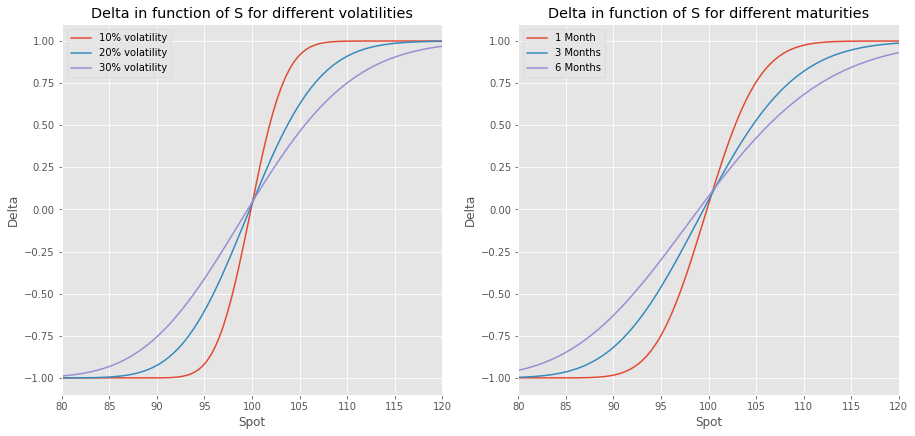

In [4]:
# Adjust size of output
plt.rcParams['figure.figsize'] = [15, 15] 


### Delta shape of a Bull Call Spread as time passes and volatility changes
strategy_deltas_low_vola = [vanilla_option(spot, K, T, r, q, 0.1, 'Call').bs_delta() 
                    + vanilla_option(spot, K, T, r, q, 0.1, 'Put').bs_delta() for spot in spots]
strategy_deltas_mid_vola = [vanilla_option(spot, K, T, r, q, 0.2, 'Call').bs_delta() 
                    + vanilla_option(spot, K, T, r, q, 0.2, 'Put').bs_delta() for spot in spots]
strategy_deltas_high_vola = [vanilla_option(spot, K, T, r, q, 0.3, 'Call').bs_delta() 
                    + vanilla_option(spot, K, T, r, q, 0.3, 'Put').bs_delta() for spot in spots]

strategy_deltas_low_mat = [vanilla_option(spot, K, 1/12, r, q, sd, 'Call').bs_delta() 
                    + vanilla_option(spot, K, 1/12, r, q, sd, 'Put').bs_delta() for spot in spots]
strategy_deltas_mid_mat = [vanilla_option(spot, K, 3/12, r, q, sd, 'Call').bs_delta() 
                    + vanilla_option(spot, K, 3/12, r, q, sd, 'Put').bs_delta() for spot in spots]
strategy_deltas_high_mat = [vanilla_option(spot, K, 6/12, r, q, sd, 'Call').bs_delta() 
                    + vanilla_option(spot, K, 6/12, r, q, sd, 'Put').bs_delta() for spot in spots]


plt.subplot(2, 2, 1)
plt.plot(spots, strategy_deltas_low_vola, label = '10% volatility')
plt.plot(spots, strategy_deltas_mid_vola, label = '20% volatility')
plt.plot(spots, strategy_deltas_high_vola, label = '30% volatility')
plt.xlabel('Spot')
plt.ylabel('Delta')
plt.legend(loc = 'upper left')
plt.title('Delta in function of S for different volatilities')
plt.xlim(left = 0.8*S, right = 1.2*S)

plt.subplot(2, 2, 2)
plt.plot(spots, strategy_deltas_low_mat, label = '1 Month')
plt.plot(spots, strategy_deltas_mid_mat, label = '3 Months')
plt.plot(spots, strategy_deltas_high_mat, label = '6 Months')
plt.xlabel('Spot')
plt.ylabel('Delta')
plt.legend(loc = 'upper left')
plt.title('Delta in function of S for different maturities')
plt.xlim(left = 0.8*S, right = 1.2*S)

(80.0, 120.0)

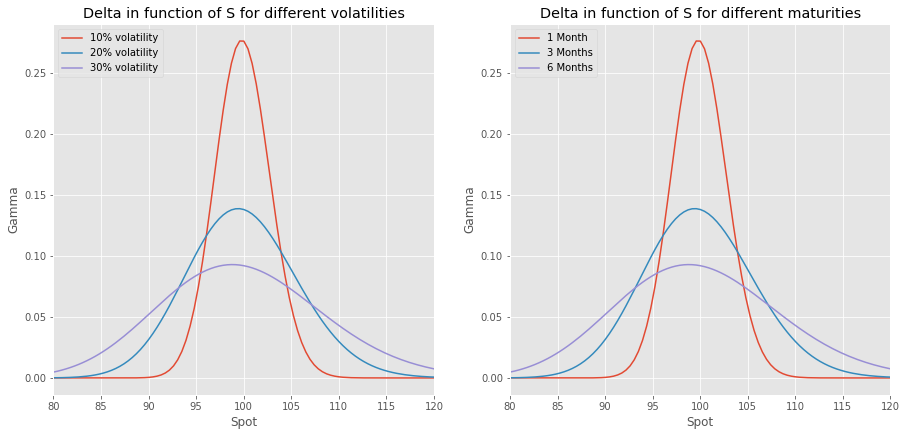

In [5]:
# Adjust size of output
plt.rcParams['figure.figsize'] = [15, 15] 


### Gamma shape of a Bull Call Spread as time passes and volatility changes
strategy_gammas_low_vola = [vanilla_option(spot, K, T, r, q, 0.1, 'Call').bs_gamma() 
                    + vanilla_option(spot, K, T, r, q, 0.1, 'Put').bs_gamma() for spot in spots]
strategy_gammas_mid_vola = [vanilla_option(spot, K, T, r, q, 0.2, 'Call').bs_gamma() 
                    + vanilla_option(spot, K, T, r, q, 0.2, 'Put').bs_gamma() for spot in spots]
strategy_gammas_high_vola = [vanilla_option(spot, K, T, r, q, 0.3, 'Call').bs_gamma() 
                    + vanilla_option(spot, K, T, r, q, 0.3, 'Put').bs_gamma() for spot in spots]

strategy_gammas_low_mat = [vanilla_option(spot, K, 1/12, r, q, sd, 'Call').bs_gamma() 
                    + vanilla_option(spot, K, 1/12, r, q, sd, 'Put').bs_gamma() for spot in spots]
strategy_gammas_mid_mat = [vanilla_option(spot, K, 3/12, r, q, sd, 'Call').bs_gamma() 
                    + vanilla_option(spot, K, 3/12, r, q, sd, 'Put').bs_gamma() for spot in spots]
strategy_gammas_high_mat = [vanilla_option(spot, K, 6/12, r, q, sd, 'Call').bs_gamma() 
                    + vanilla_option(spot, K, 6/12, r, q, sd, 'Put').bs_gamma() for spot in spots]

plt.subplot(2, 2, 1)
plt.plot(spots, strategy_gammas_low_vola, label = '10% volatility')
plt.plot(spots, strategy_gammas_mid_vola, label = '20% volatility')
plt.plot(spots, strategy_gammas_high_vola, label = '30% volatility')
plt.xlabel('Spot')
plt.ylabel('Gamma')
plt.legend(loc = 'upper left')
plt.title('Delta in function of S for different volatilities')
plt.xlim(left = 0.8*S, right = 1.2*S)

plt.subplot(2, 2, 2)
plt.plot(spots, strategy_gammas_low_vola, label = '1 Month')
plt.plot(spots, strategy_gammas_mid_vola, label = '3 Months')
plt.plot(spots, strategy_gammas_high_vola, label = '6 Months')
plt.xlabel('Spot')
plt.ylabel('Gamma')
plt.legend(loc = 'upper left')
plt.title('Delta in function of S for different maturities')
plt.xlim(left = 0.8*S, right = 1.2*S)

(80.0, 120.0)

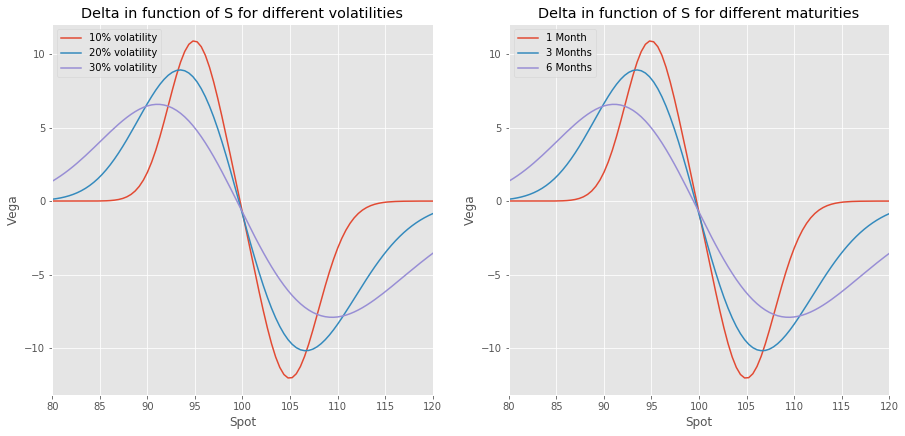

In [7]:
# Adjust size of output
plt.rcParams['figure.figsize'] = [15, 15] 


### Vega shape of a Bull Call Spread as time passes and volatility changes
strategy_vegas_low_vola = [vanilla_option(spot, K_low, T, r, q, 0.1, option_type).bs_vega() 
                   - vanilla_option(spot, K_high, T, r, q, 0.1, option_type).bs_vega() for spot in spots]
strategy_vegas_mid_vola = [vanilla_option(spot, K_low, T, r, q, 0.2, option_type).bs_vega() 
                   - vanilla_option(spot, K_high, T, r, q, 0.2, option_type).bs_vega() for spot in spots]
strategy_vegas_high_vola = [vanilla_option(spot, K_low, T, r, q, 0.3, option_type).bs_vega() 
                   - vanilla_option(spot, K_high, T, r, q, 0.3, option_type).bs_vega() for spot in spots]

strategy_vegas_low_mat = [vanilla_option(spot, K_low, 1/12, r, q, sd, option_type).bs_vega() 
                   - vanilla_option(spot, K_high, 1/12, r, q, sd, option_type).bs_vega() for spot in spots]
strategy_vegas_mid_mat = [vanilla_option(spot, K_low, 3/12, r, q, sd, option_type).bs_vega() 
                   - vanilla_option(spot, K_high, 3/12, r, q, sd, option_type).bs_vega() for spot in spots]
strategy_vegas_high_mat = [vanilla_option(spot, K_low, 6/12, r, q, sd, option_type).bs_vega() 
                   - vanilla_option(spot, K_high, 6/12, r, q, sd, option_type).bs_vega() for spot in spots]


plt.subplot(2, 2, 1)
plt.plot(spots, strategy_vegas_low_vola, label = '10% volatility')
plt.plot(spots, strategy_vegas_mid_vola, label = '20% volatility')
plt.plot(spots, strategy_vegas_high_vola, label = '30% volatility')
plt.xlabel('Spot')
plt.ylabel('Vega')
plt.legend(loc = 'upper left')
plt.title('Vega in function of S for different volatilities')
plt.xlim(left = 0.8*S, right = 1.2*S)

plt.subplot(2, 2, 2)
plt.plot(spots, strategy_vegas_low_vola, label = '1 Month')
plt.plot(spots, strategy_vegas_mid_vola, label = '3 Months')
plt.plot(spots, strategy_vegas_high_vola, label = '6 Months')
plt.xlabel('Spot')
plt.ylabel('Vega')
plt.legend(loc = 'upper left')
plt.title('Vega in function of S for different maturities')
plt.xlim(left = 0.8*S, right = 1.2*S)

In [ ]:
# Adjust size of output
plt.rcParams['figure.figsize'] = [15, 15] 


# Define strategy greeks
spots = list(np.linspace(start = 0.07, stop = 1.3*S, num = 300))
strategy_deltas = [vanilla_option(spot, K_low, T, r, q, sd, option_type).bs_delta() 
                   - vanilla_option(spot, K_high, T, r, q, sd, option_type).bs_delta() for spot in spots]
strategy_gammas = [vanilla_option(spot, K_low, T, r, q, sd, option_type).bs_gamma() 
                   - vanilla_option(spot, K_high, T, r, q, sd, option_type).bs_gamma() for spot in spots]
strategy_vegas = [vanilla_option(spot, K_low, T, r, q, sd, option_type).bs_vega() 
                  - vanilla_option(spot, K_high, T, r, q, sd, option_type).bs_vega() for spot in spots]
strategy_thetas = [vanilla_option(spot, K_low, T, r, q, sd, option_type).bs_theta() 
                  - vanilla_option(spot, K_high, T, r, q, sd, option_type).bs_theta() for spot in spots]


### Delta shape of a Bull Call Spread as time passes and volatility changes

strategy_deltas_low_vola = [vanilla_option(spot, K_low, T, r, q, 0.1, option_type).bs_delta() 
                   - vanilla_option(spot, K_high, T, r, q, 0.1, option_type).bs_delta() for spot in spots]
strategy_deltas_mid_vola = [vanilla_option(spot, K_low, T, r, q, 0.2, option_type).bs_delta() 
                   - vanilla_option(spot, K_high, T, r, q, 0.2, option_type).bs_delta() for spot in spots]
strategy_deltas_high_vola = [vanilla_option(spot, K_low, T, r, q, 0.3, option_type).bs_delta() 
                   - vanilla_option(spot, K_high, T, r, q, 0.3, option_type).bs_delta() for spot in spots]

strategy_deltas_low_mat = [vanilla_option(spot, K_low, 1/12, r, q, sd, option_type).bs_delta() 
                   - vanilla_option(spot, K_high, 1/12, r, q, sd, option_type).bs_delta() for spot in spots]
strategy_deltas_mid_mat = [vanilla_option(spot, K_low, 3/12, r, q, sd, option_type).bs_delta() 
                   - vanilla_option(spot, K_high, 3/12, r, q, sd, option_type).bs_delta() for spot in spots]
strategy_deltas_high_mat = [vanilla_option(spot, K_low, 6/12, r, q, sd, option_type).bs_delta() 
                   - vanilla_option(spot, K_high, 6/12, r, q, sd, option_type).bs_delta() for spot in spots]


plt.subplot(2, 2, 1)
plt.plot(spots, strategy_deltas_low_vola, label = '10% volatility')
plt.plot(spots, strategy_deltas_mid_vola, label = '20% volatility')
plt.plot(spots, strategy_deltas_high_vola, label = '30% volatility')
plt.xlabel('Spot')
plt.ylabel('Delta')
plt.legend(loc = 'upper left')
plt.title('Delta in function of S for different volatilities')
plt.xlim(left = 0.8*S, right = 1.2*S)

plt.subplot(2, 2, 2)
plt.plot(spots, strategy_deltas_low_mat, label = '1 Month')
plt.plot(spots, strategy_deltas_mid_mat, label = '3 Months')
plt.plot(spots, strategy_deltas_high_mat, label = '6 Months')
plt.xlabel('Spot')
plt.ylabel('Gamma')
plt.legend(loc = 'upper left')
plt.title('Delta in function of S for different maturities')
plt.xlim(left = 0.8*S, right = 1.2*S)

